<a href="https://colab.research.google.com/github/MartinDC95/Examen-de-certificaci-n-Intento-1-noviembre-/blob/main/Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importacion de las librerias para el examen
import pandas as pd
import numpy as np

# Para la vizuacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelacion y evaluacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [11]:
# Bases de datos archivos en DataFrames
df1 = pd.read_csv('/content/winequality-red.csv')
df2 = pd.read_csv('/content/winequality-white.csv')

#Visualizar los primeros datos
print("Primeros datos de df1:")
print(df1.head())

print("\nPrimeros datos de df2:")
print(df2.head())

Primeros datos de df1:
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                           

In [16]:
# Limpieza de datos
# Para la base 1:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

# Limpieza de datos
# Para la base 2
# df2.duplicated().sum()
# df2.drop_duplicates(inplace=True)

In [21]:
# Chequeo datos base 2
df2.info()  # To get information about the white wine data

# Chequeo datos base 1
df1.info()  # To get information about the red wine data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                      

In [24]:
# Listado de columnas numericas basado en el diccionario
columnas_numericas = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

# Conversión a float en cada DataFrame
for columna in columnas_numericas:
    if columna in df1.columns:
        df1[columna] = pd.to_numeric(df1[columna], errors='coerce')
    if columna in df2.columns:
        df2[columna] = pd.to_numeric(df2[columna], errors='coerce')

# Verificacion tipos de datos luego de la conversion
print("\nTipos de datos después de la conversión en el primer DataFrame:")
print(df1.dtypes)
print("\nTipos de datos después de la conversión en el segundo DataFrame:")
print(df2.dtypes)



Tipos de datos después de la conversión en el primer DataFrame:
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    object
dtype: object

Tipos de datos después de la conversión en el segundo DataFrame:
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    object
dtype: object


In [25]:
# Identificar columnas categorias
columnas_categoricas = ['country', 'quality']

# Exploración de valores únicos
print("Valores unicos en las columnas categoricas del primer DataFrame")
for columna in columnas_categoricas:
  if columna in df1.columns:
    print(f"{columna}: {df1[columna].unique()}")

print("\nValores unicos en las columnas categoricas del segundo DataFrame")
for columna in columnas_categoricas:
  if columna in df2.columns:
    print(f"{columna}: {df2[columna].unique()}")

# Unificación de formatos en valores categoricos (minusculas y sin espacios adicionales)
for columna in columnas_categoricas:
  if columna in df1.columns:
    df1[columna] = df1[columna].str.lower().str.strip()
  if columna in df2.columns:
    df2[columna] = df2[columna].str.lower().str.strip()

# Correcion manual de valores insconsistentes
# Ajuste segun los valores inconsistentes que se encuentran
correcciones = {'usa': 'united states',
    'us': 'united states',
    'united kingdom': 'uk',
    'portugal': 'portuguese',
    'france': 'french',
    'red wine': 'red',  # Supón que hay variaciones en cómo se menciona el tipo de vino
    'white wine': 'white'
}

# Aplicar las correcciones para el país y tipo de vino en ambos DataFrames
if 'country' in df1.columns:
    df1['country'] = df1['country'].replace(correcciones)
if 'country' in df2.columns:
    df2['country'] = df2['country'].replace(correcciones)

if 'wine_type' in df1.columns:
    df1['wine_type'] = df1['wine_type'].replace(correcciones)
if 'wine_type' in df2.columns:
    df2['wine_type'] = df2['wine_type'].replace(correcciones)

# Verificar los cambios
print("\nValores únicos después de la corrección en el primer DataFrame:")
for columna in columnas_categoricas:
    if columna in df1.columns:
        print(f"{columna}: {df1[columna].unique()}")

print("\nValores únicos después de la corrección en el segundo DataFrame:")
for columna in columnas_categoricas:
    if columna in df2.columns:
        print(f"{columna}: {df2[columna].unique()}")

Valores unicos en las columnas categoricas del primer DataFrame

Valores unicos en las columnas categoricas del segundo DataFrame

Valores únicos después de la corrección en el primer DataFrame:

Valores únicos después de la corrección en el segundo DataFrame:


In [7]:
import pandas as pd

# Se ajusta el codigo para cargar de nuevo los CSV's
df1 = pd.read_csv('/content/winequality-red.csv')
df2 = pd.read_csv('/content/winequality-white.csv')

# Valores faltantes en cada columnas
print("Valores faltantes en el primer DataFrame:")
print(df1.isnull().sum())

# Columnas numéricas y categóricas
columnas_numericas = df1.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df1.select_dtypes(include=['object']).columns

# Imputación en el primer DataFrame
# Para columnas numéricas.
for columna in columnas_numericas:
    if df1[columna].isnull().sum() > 0:  # Solo si hay valores faltantes
        df1[columna].fillna(df1[columna].median(), inplace=True)

# Para columnas categóricas, usaremos valores frecuentes
for columna in columnas_categoricas:
    if df1[columna].isnull().sum() > 0:
        df1[columna].fillna(df1[columna].mode()[0], inplace=True)

# DataFrame Nro. 2 Repito el mismo proceso
columnas_numericas_df2 = df2.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas_df2 = df2.select_dtypes(include=['object']).columns

for columna in columnas_numericas_df2:
    if df2[columna].isnull().sum() > 0:
        df2[columna].fillna(df2[columna].median(), inplace=True)

for columna in columnas_categoricas_df2:
    if df2[columna].isnull().sum() > 0:
        df2[columna].fillna(df2[columna].mode()[0], inplace=True)

# Verificación de que no queden valores faltantes
print("\nVerificación de valores faltantes después de la imputación en el primer DataFrame:")
print(df1.isnull().sum())

print("\nVerificación de valores faltantes después de la imputación en el segundo DataFrame:")
print(df2.isnull().sum())


Valores faltantes en el primer DataFrame:
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

Verificación de valores faltantes después de la imputación en el primer DataFrame:
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

Verificación de valores faltantes después de la imputación en el segundo DataFrame:
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


Exploracion de datos

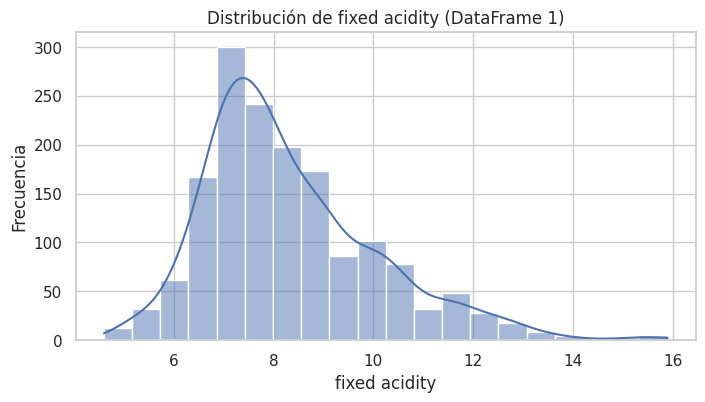

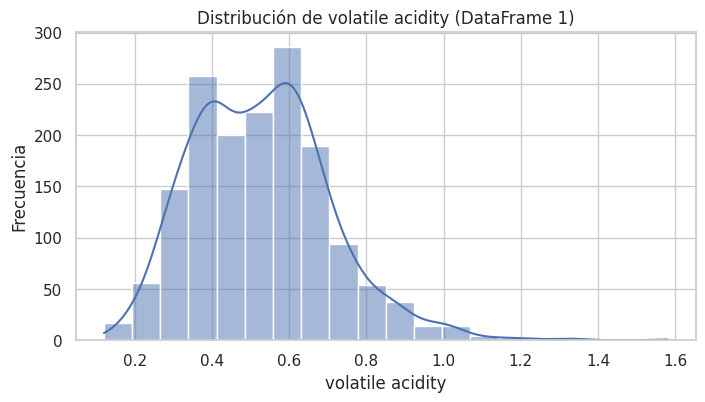

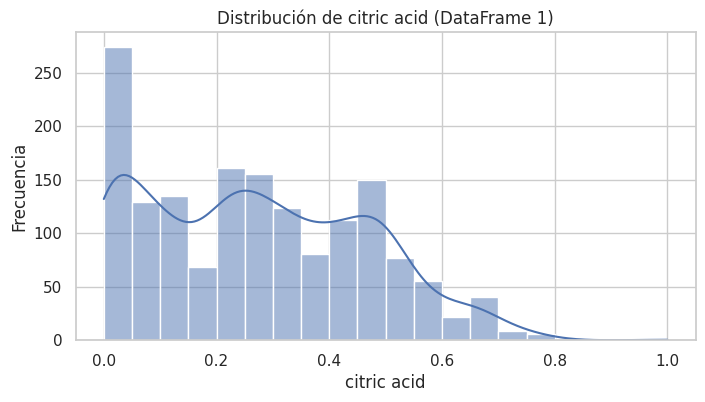

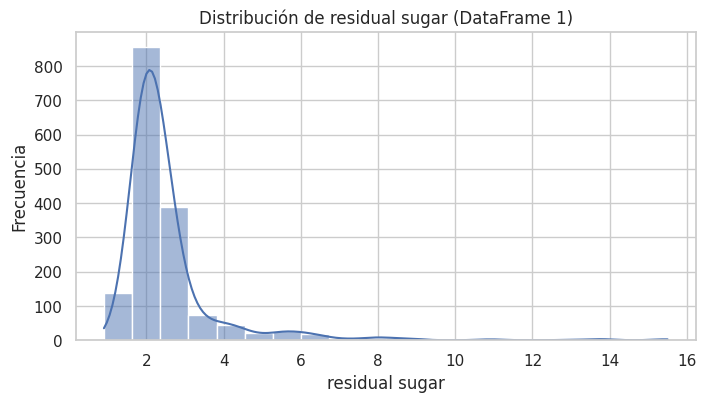

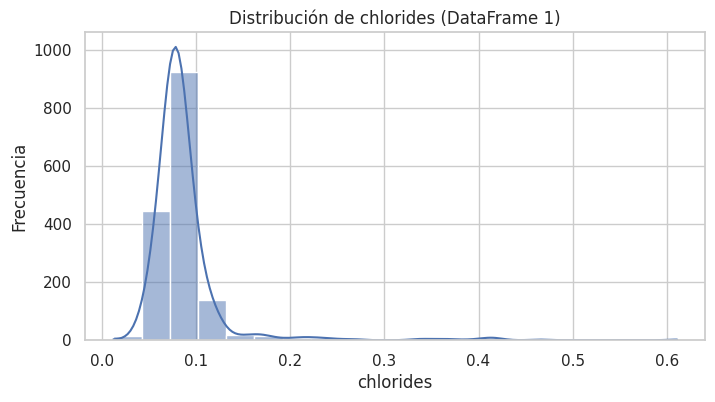

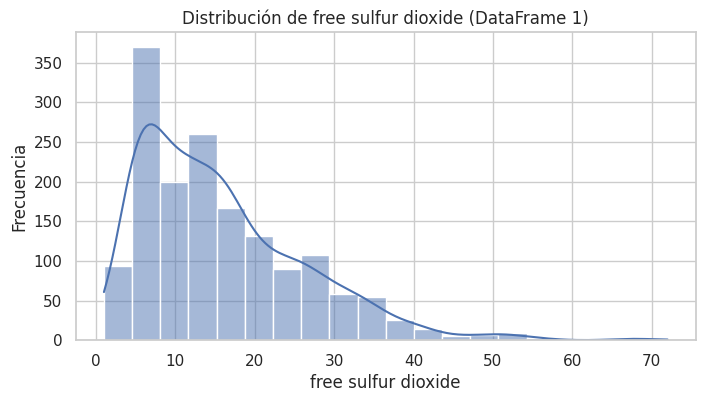

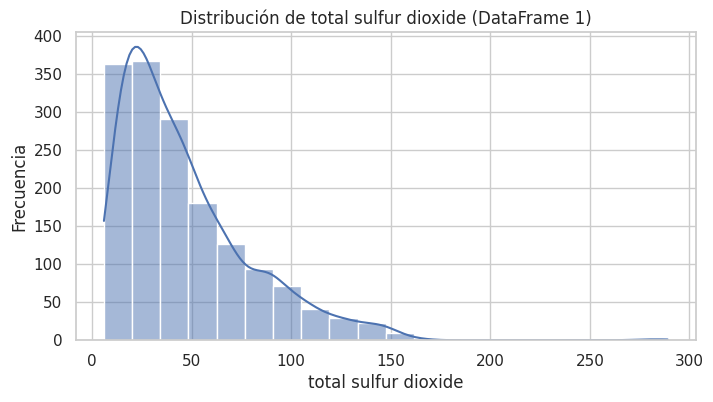

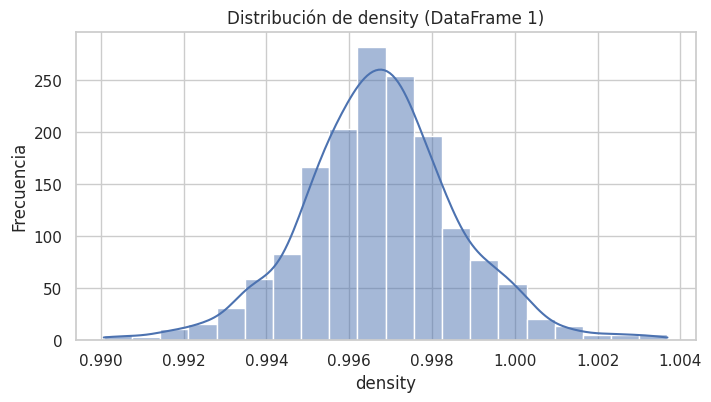

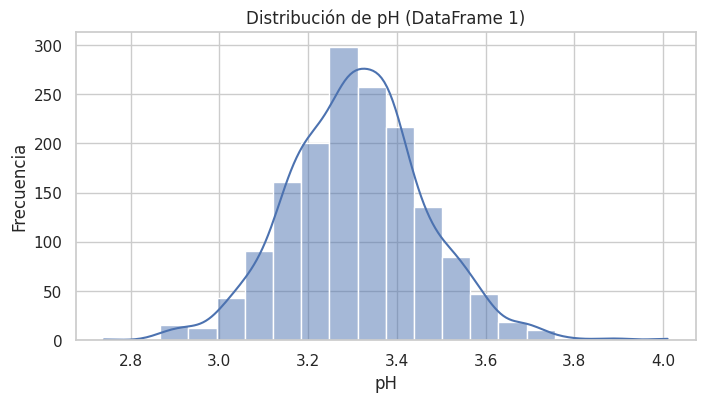

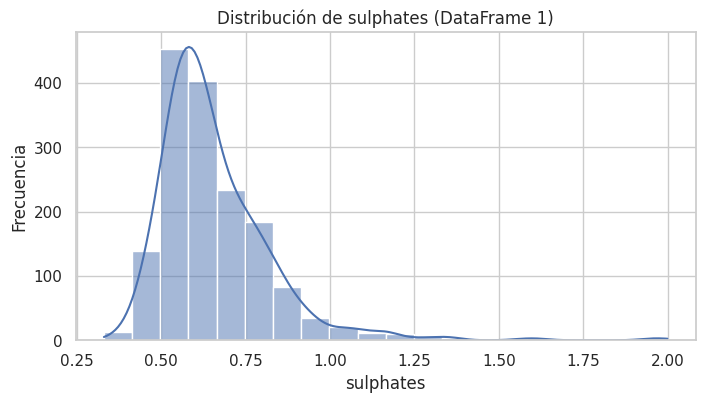

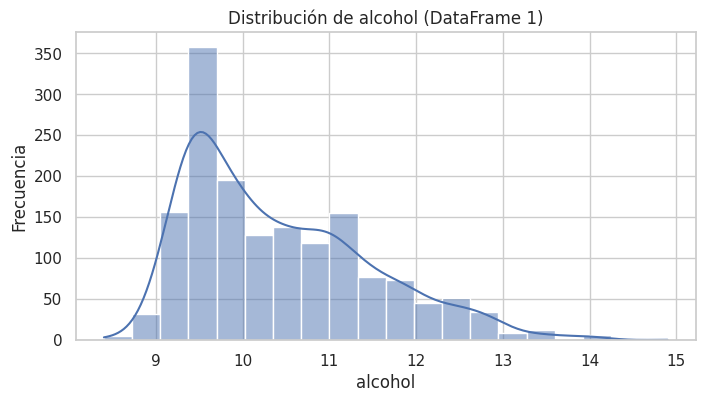

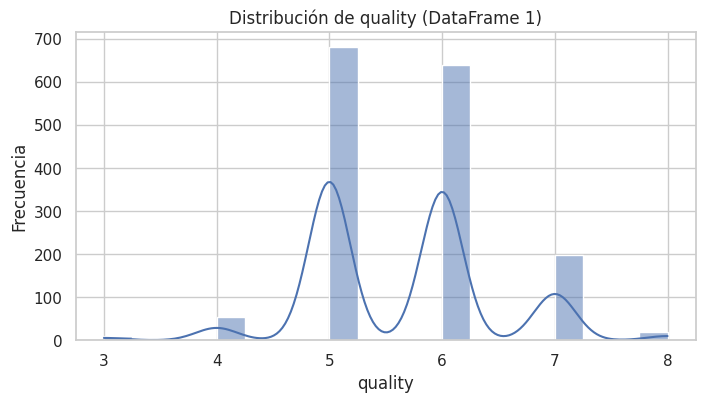

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo de gráficos
sns.set(style="whitegrid")

# Obtener listas de columnas numéricas y categóricas automáticamente
columnas_numericas = df1.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df1.select_dtypes(include=['object']).columns

# Histograma para cada variable numérica en el primer DataFrame
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[columna], kde=True, bins=20)
    plt.title(f'Distribución de {columna} (DataFrame 1)')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráfico de barras para variables categóricas en el primer DataFrame
for columna in columnas_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x=columna)
    plt.title(f'Conteo de categorías en {columna} (DataFrame 1)')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()



In [14]:
import pandas as pd

# Estadísticas descriptivas de las variables numéricas en el primer DataFrame
# Se obtiene primero la lista de columnas numericas
columnas_numericas = df1.select_dtypes(include=['number']).columns  # Use 'number' to encompass numeric types
# Luego se aplica describe a esas columnas
print("Estadísticas descriptivas de las variables numéricas (DataFrame 1):")
print(df1[columnas_numericas].describe())

# Se obtiene la lista de columnas categoricas
columnas_categoricas = df1.select_dtypes(exclude=['number']).columns  # Exclude numeric types


# Estadísticas descriptivas de las variables numéricas en el segundo DataFrame
# De igual forma, se obtiene primero la lista de columnas numericas
columnas_numericas_df2 = df2.select_dtypes(include=['number']).columns
# Luego se aplica describe a esas columnas
print("\nEstadísticas descriptivas de las variables numéricas (DataFrame 2):")
print(df2[columnas_numericas_df2].describe())

# Se obtiene la lista de columnas categoricas
columnas_categoricas_df2 = df2.select_dtypes(exclude=['number']).columns

Estadísticas descriptivas de las variables numéricas (DataFrame 1):
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895

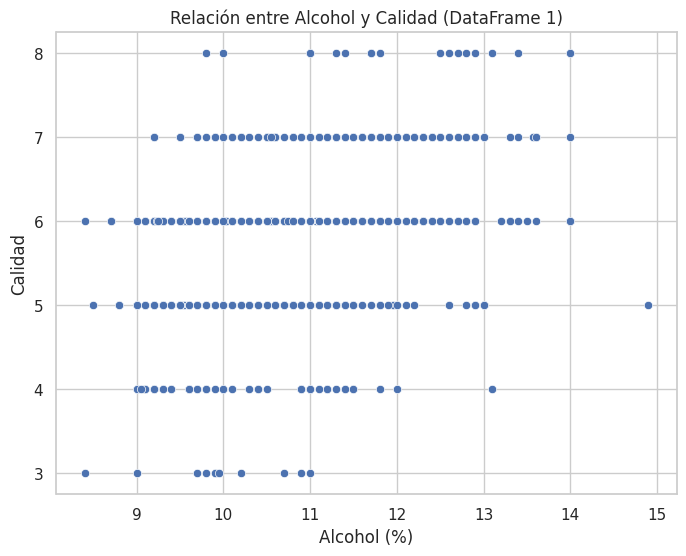

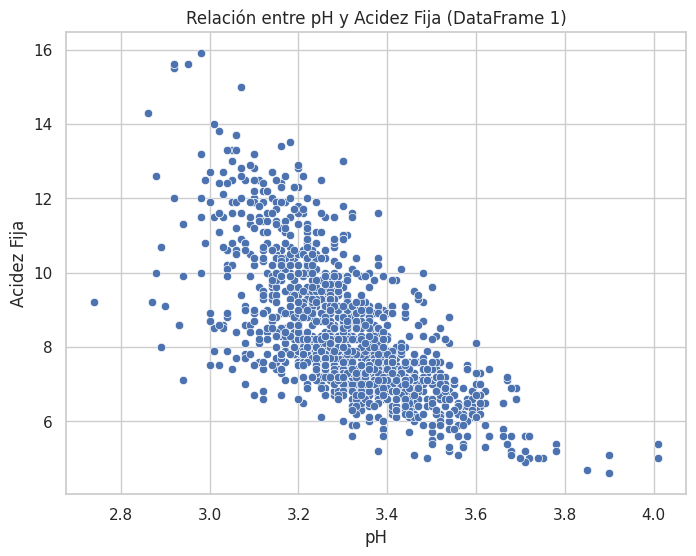

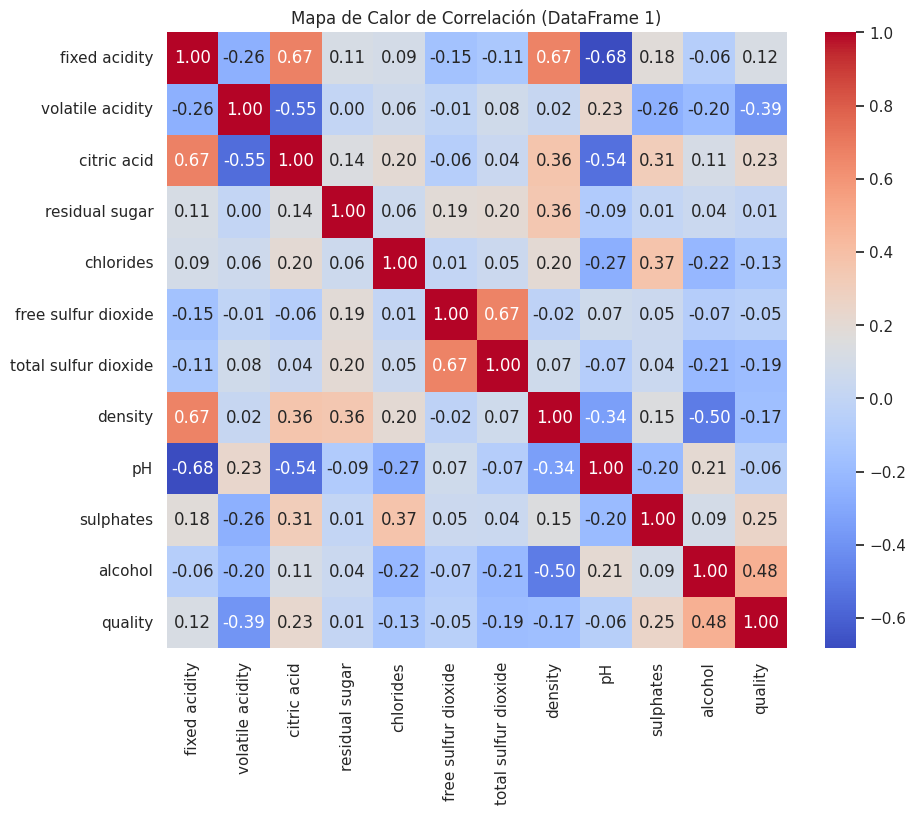

In [15]:
# Diagrama de dispersión entre 'alcohol' y 'quality' en el primer DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='alcohol', y='quality')
plt.title('Relación entre Alcohol y Calidad (DataFrame 1)')
plt.xlabel('Alcohol (%)')
plt.ylabel('Calidad')
plt.show()

# Diagrama de dispersión entre 'pH' y 'fixed acidity' en el primer DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='pH', y='fixed acidity')
plt.title('Relación entre pH y Acidez Fija (DataFrame 1)')
plt.xlabel('pH')
plt.ylabel('Acidez Fija')
plt.show()

# Mapa de calor de correlación para variables numéricas en el primer DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df1[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación (DataFrame 1)')
plt.show()


Preparacion de dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = df1.drop(columns=['quality'])  # Asegúrate de que 'quality' es la variable objetivo
y = df1['quality']

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear una función para imprimir las métricas de evaluación
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Evaluar Regresión Logística
print("Evaluación del modelo de Regresión Logística:")
evaluar_modelo(log_reg, X_test, y_test)

# Evaluar KNN
print("\nEvaluación del modelo KNN:")
evaluar_modelo(knn, X_test, y_test)


Evaluación del modelo de Regresión Logística:
Accuracy: 0.57
Precision: 0.56
Recall: 0.57
F1 Score: 0.55

Evaluación del modelo KNN:
Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1 Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Generar las predicciones

In [21]:
# Generar predicciones con Regresión Logística
y_pred_log_reg = log_reg.predict(X_test)

# Generar predicciones con KNN
y_pred_knn = knn.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluación para el modelo de Regresión Logística
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

# Evaluación para el modelo de KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Imprimir resultados
print("Resultados de Regresión Logística:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}\n")

print("Resultados de KNN:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")


Resultados de Regresión Logística:
Accuracy: 0.57
Precision: 0.56
Recall: 0.57
F1 Score: 0.55

Resultados de KNN:
Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1 Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


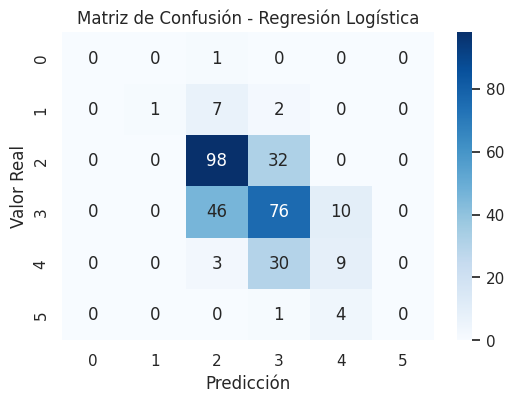

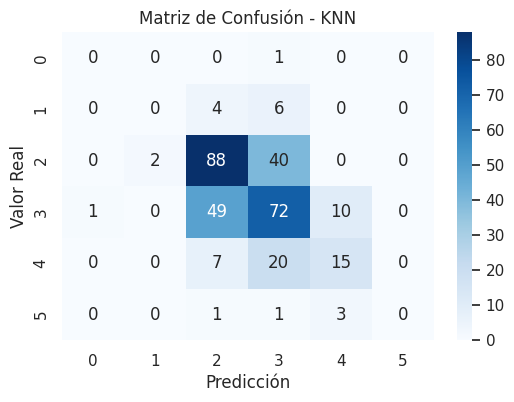

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para Regresión Logística
plt.figure(figsize=(6, 4))
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Matriz de confusión para KNN
plt.figure(figsize=(6, 4))
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Reporte de clasificación para Regresión Logística
print("Reporte de Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))

# Reporte de clasificación para KNN
print("Reporte de Clasificación - KNN:")
print(classification_report(y_test, y_pred_knn))


Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320

Reporte de Clasificación - KNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m